<a href="https://colab.research.google.com/github/KazGet/Summer_prac/blob/main/Summer_practies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost
from catboost import CatBoostRegressor, CatBoostClassifier, Pool

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive; drive.mount('/content/drive')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, RocCurveDisplay, roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import Pipeline

In [150]:
file = "/content/main.xlsx"
df = pd.read_excel(file, sheet_name=1)
df=df.drop([0,"Complete/CENSORED (–î–∞–Ω–Ω—ã–µ –∑–∞–≤–µ—Ä—à–µ–Ω—ã/ –≤—ã—à–µ–ª –∏–∑ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è)",
            "HisDiseasNumb", "date prior MI (–î–∞—Ç–∞ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∏–Ω—Ñ–∞—Ä–∫—Ç–∞)",
            "date CABG", "date prior PCI", "Plaque texture", "Plaque echogenicity", "Hb",
            "Troponine", "BNP",	"NTproBNP","hsCRP", "ALT", "AST", "GGT", "bilirubin", "Therapy anti diabetic drugs",
            "Therapy: digitalis", "Therapy other (specify)", "LM (%)", "LAD (%)", "RCA (%)",
            "LCx (%)", "max%sten",	"FFR, LAD",	"FFR, RCA",	"FFA, Cx","iFR, LAD","iFR, RCA","iFR, Cx", "EQL-5", "GLS RV stress", "Angiography", "6-min test, metres", "HbA1"], axis=1)
df=df.drop("Phenotype angio: 0 - –∞–Ω–∞—Ç-, –≥–µ–º–æ-, 1- –∞–Ω–∞—Ç-, –≥–µ–º–æ + (–ø–æ –§–†–ö, –≥–¥–µ –µ—Å—Ç—å), 2 - –∞–Ω–∞—Ç+, –≥–µ–º–æ -, 3 - –∞–Ω–∞—Ç+, –≥–µ–º–æ +", axis=1)
out_the_door=[
              'Minutes Exercise', 'Sat O2 rest', 'HR rest', 'SBP rest', 'DBP rest', 'MM rest', 'LVEDV rest', 'LVESV  rest', 'WMSI  rest', 'SV rest', 'LAD at rest', 'B-lines at rest', 'GLS rest',
              'LA vol rest', 'RA vol rest', 'E rest', 'A rest', 'DTE rest', "e' rest", "a' rest", "s' rest", 'TAPSE rest', 'S RV rest', 'MR rest', 'TR vel rest',
              'RVSP rest', 'GLS RV rest', 'Diast dysfunc rest', 'HR stress', 'SBP stress', 'DBP stress', 'LVEDV stress', 'LVESV stress', 'WMSI stress', 'SV stress',
              'LAD stress', 'B-lines stress', 'GLS stress-', 'LA vol  stress', 'RA vol stress', 'E  stress', 'A  stress', 'DTE stress', "e'  stress",
              "a'  stress", "s'  stress", 'TAPSE  stress', 'S RV  stress', 'MR  stress', 'TR vel  stress', 'RVSP  stress', 'Diast dysfunc  stress']
df=df.drop(out_the_door, axis=1)

df.drop(['Date of stress', 'Date Angiography', 'Data of birth', 'Last FU, Date (–î–∞—Ç–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–≥–æ –æ—Å–º–æ—Ç—Ä–∞)'], axis=1, inplace=True)
df['LBBB (–ë–ª–æ–∫–∞–¥–∞ –ª–µ–≤–æ–π –Ω–æ–∂–∫–∏ –ø—É—á–∫–∞ –ì–∏—Å–∞)'] = df['LBBB (–ë–ª–æ–∫–∞–¥–∞ –ª–µ–≤–æ–π –Ω–æ–∂–∫–∏ –ø—É—á–∫–∞ –ì–∏—Å–∞)'].replace('RBBB', 0)
rbbb_mask = df['LBBB (–ë–ª–æ–∫–∞–¥–∞ –ª–µ–≤–æ–π –Ω–æ–∂–∫–∏ –ø—É—á–∫–∞ –ì–∏—Å–∞)'] == 0
df['RBBB'] = rbbb_mask.astype(int)

categorical_features = ["ECG Rhythm (–†–∏—Ç–º –ø–æ –≠–ö–ì)", "Smoker", "Stress Type", "Reason for Referral",
                        "Reason of Stress Stop","Peak ECG"]
df[categorical_features] = df[categorical_features].fillna("NaN").astype(str)

X = df.drop('All sten range (–ö–∞—Ä–∞–Ω–∞—Ä–æ–≥—Ä–∞—Ñ–∏—è)', axis=1)
y = df['All sten range (–ö–∞—Ä–∞–Ω–∞—Ä–æ–≥—Ä–∞—Ñ–∏—è)']

# encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# X[categorical_features] = encoder.fit_transform(X[categorical_features])
# X.columns = X.columns.astype(str)
# X.columns = X.columns.str.replace(r'[\[\]<>]', '', regex=True)

mask = df['All sten range (–ö–∞—Ä–∞–Ω–∞—Ä–æ–≥—Ä–∞—Ñ–∏—è)'].isin([0, 1])
X = X[mask]
y = y[mask]

/tmp/ipython-input-150-3072846023.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LBBB (–ë–ª–æ–∫–∞–¥–∞ –ª–µ–≤–æ–π –Ω–æ–∂–∫–∏ –ø—É—á–∫–∞ –ì–∏—Å–∞)'] = df['LBBB (–ë–ª–æ–∫–∞–¥–∞ –ª–µ–≤–æ–π –Ω–æ–∂–∫–∏ –ø—É—á–∫–∞ –ì–∏—Å–∞)'].replace('RBBB', 0)


In [ ]:
# @title –†–µ–≥—Ä–µ—Å—Å–æ—Ä
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(indexes_for_test), y.drop(indexes_for_test),
    test_size=0.2,
    random_state=42,
    shuffle=True
)

modelreg = CatBoostRegressor(
    iterations=500,
    learning_rate=0.01,
    depth=4,
    cat_features=categorical_features,
    eval_metric='RMSE',
    l2_leaf_reg=1,
    verbose=100
)

modelreg.fit(X_train, y_train)

# for j,i in zip(list(map(round, pred)), y_test):
#   if j!=int(i):
#     print(1)

# feature_importance = model.get_feature_importance()
# for name, score in zip(X_train.columns, feature_importance):
#     print(f"{name}: {round(score, 3)}")


# plt.barh(X_train.columns, feature_importance)
# plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
# plt.show()

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


y_pred = modelreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R¬≤: {r2}")

# scores = cross_val_score(modelreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = (-scores)**0.5
# print(f"–°—Ä–µ–¥–Ω–∏–π RMSE –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {rmse_scores.mean()}")

0:	learn: 0.4734985	total: 79.9ms	remaining: 39.8s
100:	learn: 0.2962319	total: 2.54s	remaining: 10s
200:	learn: 0.2385774	total: 4.78s	remaining: 7.11s
300:	learn: 0.2140942	total: 6.56s	remaining: 4.34s
400:	learn: 0.1972232	total: 8.3s	remaining: 2.05s
499:	learn: 0.1828592	total: 10.5s	remaining: 0us


In [133]:
X_boost_for_cat = X[['LPHD_Ch', 'Reason for Referral', 'ESC Pre-test Probability', "slow flow", 'Body surface area', 'FFR range']]

In [ ]:
# @title CatBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X_boost_for_cat, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)
train_pool = Pool(X_train, label=y_train)
test_pool = Pool(X_test, label=y_test)

model = CatBoostClassifier(depth = 3, iterations=100, l2_leaf_reg = 1, learning_rate = 0.01, verbose=20, bagging_temperature=0)
model.fit(train_pool)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
print("ROC AUC (Train):", roc_auc_score(y_train, y_train_pred_proba))

y_pred_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# –í—ã–≤–æ–¥ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
for i in range(len(X_boost_for_cat.columns)):
    print(f"{X_boost_for_cat.columns[indices[i]]}: {importances[indices[i]]:.4f}")

In [8]:
# @title –£–¥–∞–ª–µ–Ω–∏–µ –ø–æ–ª—É–ø—É—Å—Ç—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–µ–¥–∏–∞–Ω–æ–π
missing_percent = df.isnull().mean()
cols_to_drop = missing_percent[missing_percent > 0.3].index
df_dropped = df.drop(cols_to_drop, axis=1)

X_dropped = df_dropped.drop('All sten range (–ö–∞—Ä–∞–Ω–∞—Ä–æ–≥—Ä–∞—Ñ–∏—è)', axis=1)

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_dropped[categorical_features] = encoder.fit_transform(X_dropped[categorical_features])
X_dropped = X_dropped[mask]

imputer = SimpleImputer(strategy='median')
X_filled = imputer.fit_transform(X_dropped)
X_filled_data = pd.DataFrame(X_filled, columns=X_dropped.columns)

In [9]:
# @title –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–º KNNImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))

imputer = KNNImputer(n_neighbors=5)
df_imputed_scaled = imputer.fit_transform(df_scaled)
df_KNN = scaler.inverse_transform(df_imputed_scaled)
df_final = pd.DataFrame(df_KNN, columns=X.columns)

In [23]:
# @title –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ—Ç–æ–¥–æ–º Iterative Imputer
imputer = IterativeImputer(max_iter=20, random_state=0)
df_imputed = imputer.fit_transform(X)
df_MICE = pd.DataFrame(df_imputed, columns=X.columns)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [11]:
# @title –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ—Ç–æ–¥–æ–º MissForest
!pip install missforest
from missforest import MissForest

mf = MissForest(
    clf=RandomForestClassifier(n_jobs=-1),
    rgr=RandomForestRegressor(n_jobs=-1),
    categorical=categorical_features,
)
df_miss_forest = mf.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [08:58<00:00, 107.60s/it]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estim

X_med: –ö–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–±—ä—è—Å–Ω—è—é—â–∏–µ 95% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ = 56
df_KNN: –ö–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–±—ä—è—Å–Ω—è—é—â–∏–µ 95% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ = 60
df_MICE: –ö–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–±—ä—è—Å–Ω—è—é—â–∏–µ 95% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ = 58
df_MissForest: –ö–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–±—ä—è—Å–Ω—è—é—â–∏–µ 95% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ = 60


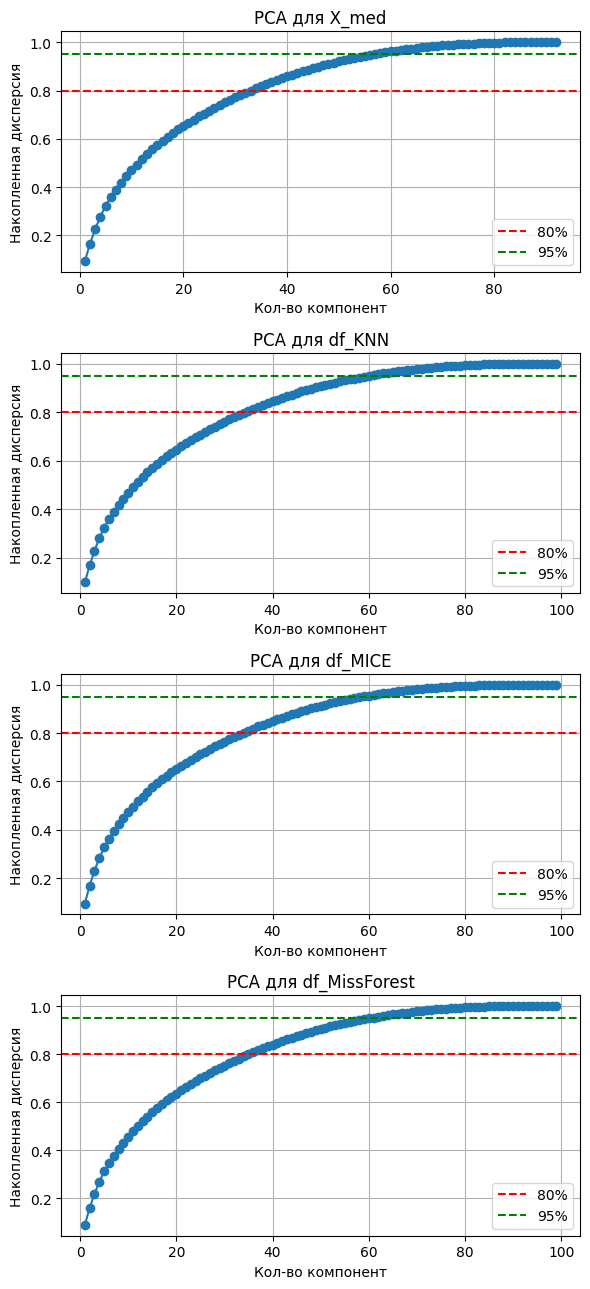

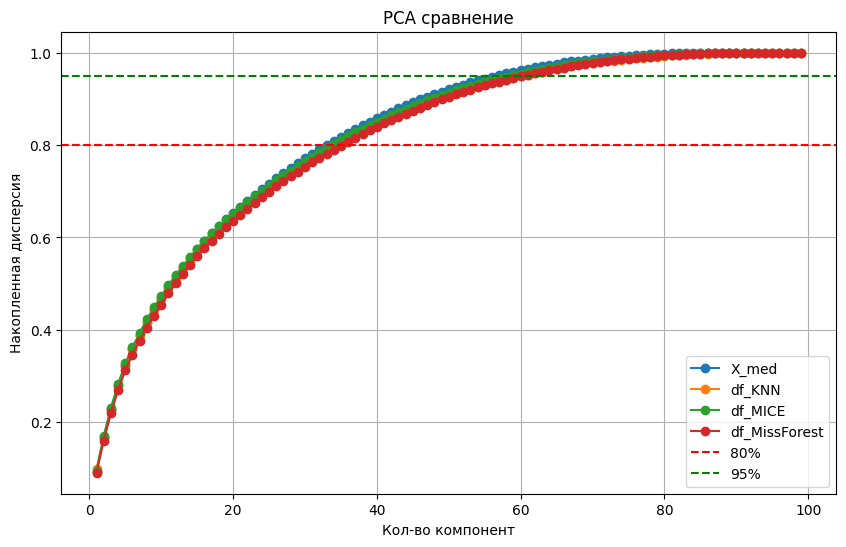

In [166]:
# @title PCA
fig, axes = plt.subplots(4, 1, figsize=(6, 13))

datasets = [
    ("X_med", X_filled_data),
    ("df_KNN", df_final),
    ("df_MICE", df_MICE),
    ("df_MissForest", df_miss_forest)
]

for ax, (name, data) in zip(axes, datasets):
    X_numeric = data.select_dtypes(include=[np.number])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    ax.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
    ax.axhline(0.8, color='r', linestyle='--', label='80%')
    ax.axhline(0.95, color='g', linestyle='--', label='95%')
    ax.set_xlabel('–ö–æ–ª-–≤–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç')
    ax.set_ylabel('–ù–∞–∫–æ–ø–ª–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è')
    ax.set_title(f'PCA –¥–ª—è {name}')
    ax.legend()
    ax.grid()

    n_components = len(list(filter(lambda x: x <= 0.95, explained_variance)))
    print(f"{name}: –ö–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–±—ä—è—Å–Ω—è—é—â–∏–µ 95% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ = {n_components}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

for name, data in datasets:
    X_numeric = data.select_dtypes(include=[np.number])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label=name)

plt.axhline(0.8, color='r', linestyle='--', label='80%')
plt.axhline(0.95, color='g', linestyle='--', label='95%')
plt.xlabel('–ö–æ–ª-–≤–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç')
plt.ylabel('–ù–∞–∫–æ–ø–ª–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è')
plt.title('PCA —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# @title –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –º–∞—Ç—Ä–∏—Ü–µ –≤–µ—Å–æ–≤ PCA
X_numeric = X_filled_data.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

loadings_df = pd.DataFrame(
    data=pca.components_,
    columns=X_numeric.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)
def get_most_important_features(component, loadings_df, n_features=1):
    pc_loadings = loadings_df.loc[component]
    most_important = pc_loadings.abs().sort_values(ascending=False).head(n_features)
    return loadings_df.loc[component, most_important.index]
    # return loadings_df.loc[component]

new_X = []
for i in range(1, 41):
  new_X.append(get_most_important_features(f'PC{i}', loadings_df))
  # print(get_most_important_features(f'PC{i}', loadings_df, n_features=1))

print(new_X)
# # –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –Ω–∞–≥—Ä—É–∑–∫–∏ –¥–ª—è –ø–µ—Ä–≤—ã—Ö 10 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç
# plt.figure(figsize=(15, 8))
# sns.heatmap(loadings_df.head(10), cmap='vlag', annot=False) # annot=True, –µ—Å–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ
# plt.title('–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –Ω–∞–≥—Ä—É–∑–æ–∫ PCA (–ø–µ—Ä–≤—ã–µ 10 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç)')
# plt.show()

[ABCDE score+ECG+angina    0.272474
Name: PC1, dtype: float64, LVESVi at rest    0.287928
Name: PC2, dtype: float64, H2FPEF 2018 Score    0.323298
Name: PC3, dtype: float64, Weight    0.301293
Name: PC4, dtype: float64, LV contractile reserve    0.251716
Name: PC5, dtype: float64, N_Vessel sign    0.257086
Name: PC6, dtype: float64, Delta EF >=5 - 0, <5 - 1    0.278113
Name: PC7, dtype: float64, GLS delta    0.381844
Name: PC8, dtype: float64, AF (–§–∏–±—Ä–∏–ª–ª—è—Ü–∏—è –ø—Ä–µ–¥—Å–µ—Ä–¥–∏–π)    0.314085
Name: PC9, dtype: float64, Creatinine clearance    0.268772
Name: PC10, dtype: float64, ECG range    0.272414
Name: PC11, dtype: float64, Creatinine clearance    0.317332
Name: PC12, dtype: float64, LBBB (–ë–ª–æ–∫–∞–¥–∞ –ª–µ–≤–æ–π –Ω–æ–∂–∫–∏ –ø—É—á–∫–∞ –ì–∏—Å–∞)    0.303257
Name: PC13, dtype: float64, LAVI stress    0.240291
Name: PC14, dtype: float64, Therapy: ACE-I    0.322972
Name: PC15, dtype: float64, E/A stress    0.329131
Name: PC16, dtype: float64, Prior MI ( –ü–µ—Ä–µ–Ω–µ—Å—ë–Ω–

In [25]:
# @title –†–µ–∫—É—Ä—Å–∏–≤–Ω–æ–µ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (Recursive Feature Elimination, RFE): –ú–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è –Ω–∞ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö, –∑–∞—Ç–µ–º —Å–∞–º—ã–π –Ω–µ–≤–∞–∂–Ω—ã–π —É–¥–∞–ª—è–µ—Ç—Å—è, –∏ –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è.
select_num = 12
selector_med = RFE(estimator=RandomForestClassifier(), n_features_to_select=select_num)
selector_med.fit(X_filled, y)
selected_features_med = X_dropped.columns[selector_med.get_support()]
print("–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö, –∑–∞–ø–æ–ª–µ–Ω–Ω—ã–º–∏ –º–µ–¥–∏–∞–Ω–æ–π: ")
print(selected_features_med.tolist())

selector_KNN = RFE(estimator=RandomForestClassifier(), n_features_to_select=select_num)
selector_KNN.fit(df_KNN, y)
selected_features_KNN = X.columns[selector_KNN.get_support()]
print(f"–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö, –∑–∞–ø–æ–ª–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–æ–º –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π: ")
print(selected_features_KNN.tolist())

selector_MICE = RFE(estimator=RandomForestClassifier(), n_features_to_select=select_num)
selector_MICE.fit(df_MICE, y)
selected_features_MICE = X.columns[selector_MICE.get_support()]
print(f"–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö, –∑–∞–ø–æ–ª–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–æ–º –∏—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è: ")
print(selected_features_MICE.tolist())

selector_MissF = RFE(estimator=RandomForestClassifier(), n_features_to_select=select_num)
selector_MissF.fit(df_miss_forest, y)
selected_features_MissF = X.columns[selector_MissF.get_support()]
print(f"–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö, –∑–∞–ø–æ–ª–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–æ–º MissForest: ")
print(selected_features_MissF.tolist())

print("\n–ü–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: ")
print(set(selected_features_med) & set(selected_features_KNN) & set(selected_features_MICE) & set(selected_features_MissF))

–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö, –∑–∞–ø–æ–ª–µ–Ω–Ω—ã–º–∏ –º–µ–¥–∏–∞–Ω–æ–π: 
['Age', 'Height', 'Body surface area', 'Peripheral artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ø–µ—Ä–∏—Ñ–µ—Ä–∏—á–µ—Å–∫–∏—Ö –∞—Ä—Ç–µ—Ä–∏–π)', 'LPHD_Ch', 'Type Angiography', 'N.vessels', 'N_Vessel sign', 'LAD range', 'Reason for Referral', 'IMM rest', 'HRR']
–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö, –∑–∞–ø–æ–ª–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–æ–º –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π: 
['Body surface area', 'LPHD_Ch', 'Trigliceride', 'Glukosa', 'N.vessels', 'N_Vessel sign', 'slow flow', 'LAD range', 'Reason for Referral', 'ESC Pre-test Probability', 'IMM rest', 'CFVR']
–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö, –∑–∞–ø–æ–ª–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–æ–º –∏—Ç–µ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è: 
['Age', 'LPHD_Ch', 'Glukosa', 'Type Angiography', 'N.vessels', 'N_Vessel sign', 'slow flow', 'LAD range', 'Reason for Referral', 'ESC Pre-test Probability', 'HRR', 'RAI stress']
–û—

In [26]:
print("\n–ü–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: ")
print(set(selected_features_med) & set(selected_features_KNN) & set(selected_features_MICE))


–ü–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 
{'LAD range', 'LPHD_Ch', 'N_Vessel sign', 'Reason for Referral', 'N.vessels'}


In [19]:
# @title RFECV ‚Äî  RFE —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–º –≤—ã–±–æ—Ä–æ–º —á–∏—Å–ª–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —á–µ—Ä–µ–∑ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é
df_test = df_MICE
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
selector = RFECV(estimator=RandomForestClassifier(), step=1, cv=cv, scoring='accuracy', n_jobs=-1)
selector.fit(df_test, y)
selected_features = df_test.columns[selector.get_support()]
print("–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:", selector.n_features_)
print("–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:", selected_features.tolist())

–û–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 68
–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏: ['Age', 'Sex', 'Height', 'Weight', 'Body mass index', 'Body surface area', 'Smoker', 'COPD (—Ö—Ä–æ–Ω–∏—á–µ—Å–∫–∞—è –æ–±—Å—Ç—Ä—É–∫—Ç–∏–≤–Ω–∞—è –±–æ–ª–µ–∑–Ω—å –ª–µ–≥–∫–∏—Ö)', 'PCI past –ü—Ä–æ—à–ª–æ–µ —Å—Ç–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ (—á–µ—Ä–µ–∑–∫–æ–∂–Ω–æ–µ –≤–º–µ—à–∞—Ç–µ–ª—å—Å—Ç–≤–æ)', 'Peripheral artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ø–µ—Ä–∏—Ñ–µ—Ä–∏—á–µ—Å–∫–∏—Ö –∞—Ä—Ç–µ—Ä–∏–π)', 'Carotid artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ —Å–æ–Ω–Ω–æ–π –∞—Ä—Ç–µ—Ä–∏–∏)', 'Cholesterol', 'LPLD_Ch', 'LPHD_Ch', 'Trigliceride', 'Creatinine', 'Creatinine clearance', 'Glukosa', 'Therapy: beta-blocker', 'Therapy: statin', 'Therapy: other antiplatelet agent', 'Type Angiography', 'N.vessels', 'slow flow', 'FFR range', 'Reason for Referral', 'ESC Pre-test Probability', 'NYHA Class', 'ESC 2019 HFpEF Score', 'H2FPEF 2018 Score', 'Stress Time', 'Reason of Stress Stop', 'Peak ECG', 'IMM rest', 'LVEDVi at rest', 'LVESVi at res

In [27]:
# @title –û—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–µ—Ç–æ–¥–æ–º ANOVA: –æ—Ü–µ–Ω–∫–∞ —Å—Ç–∞—Ç. —Å–≤—è–∑–∏ –º–µ–∂–¥—É –∫–∞–∂–¥—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
selector1 = SelectKBest(score_func=f_classif, k=select_num)
X_med = selector1.fit_transform(X_filled, y)
selector2 = SelectKBest(score_func=f_classif, k=select_num)
X_KNN = selector2.fit_transform(df_KNN, y)
selector3 = SelectKBest(score_func=f_classif, k=select_num)
X_MICE = selector3.fit_transform(df_MICE, y)
selector4 = SelectKBest(score_func=f_classif, k=select_num)
X_MF = selector4.fit_transform(df_miss_forest, y)

scores1 = selector1.scores_
p_values1 = selector1.pvalues_
scores2 = selector2.scores_
p_values2 = selector2.pvalues_
scores3 = selector3.scores_
p_values3 = selector3.pvalues_
scores4 = selector4.scores_
p_values4 = selector4.pvalues_


# for i, col in enumerate(X.columns):
#     print(f"–ü—Ä–∏–∑–Ω–∞–∫ '{col}': F-score = {scores[i]:.2f}, p-value = {p_values[i]:.4f}")

selected_features1 = X_dropped.columns[selector1.get_support()]
print(f"\n–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –¥–∞–Ω–Ω—ã–º–∏ —Å –º–µ–¥–∏–∞–Ω–æ–π:\n {list(selected_features1)}")

selected_features2 = X.columns[selector2.get_support()]
print(f"\n–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –¥–∞–Ω–Ω—ã–º–∏ KNN:\n {list(selected_features2)}")

selected_features3 = X.columns[selector3.get_support()]
print(f"\n–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –¥–∞–Ω–Ω—ã–º–∏ MICE:\n {list(selected_features3)}")

selected_features4 = X.columns[selector4.get_support()]
print(f"\n–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –¥–∞–Ω–Ω—ã–º–∏ MF:\n {list(selected_features4)}")

print("\n–ü–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ –≤—Å–µ—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤:")
print(set(selected_features1) & set(selected_features2) & set(selected_features3))


–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –¥–∞–Ω–Ω—ã–º–∏ —Å –º–µ–¥–∏–∞–Ω–æ–π:
 ['Sex', 'Prior MI ( –ü–µ—Ä–µ–Ω–µ—Å—ë–Ω–Ω—ã–π –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞)', 'PCI past –ü—Ä–æ—à–ª–æ–µ —Å—Ç–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ (—á–µ—Ä–µ–∑–∫–æ–∂–Ω–æ–µ –≤–º–µ—à–∞—Ç–µ–ª—å—Å—Ç–≤–æ)', 'Peripheral artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ø–µ—Ä–∏—Ñ–µ—Ä–∏—á–µ—Å–∫–∏—Ö –∞—Ä—Ç–µ—Ä–∏–π)', 'Carotid artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ —Å–æ–Ω–Ω–æ–π –∞—Ä—Ç–µ—Ä–∏–∏)', 'Therapy: beta-blocker', 'Therapy: statin', 'Type Angiography', 'N.vessels', 'N_Vessel sign', 'slow flow', 'LAD range']

–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –¥–∞–Ω–Ω—ã–º–∏ KNN:
 ['Sex', 'PCI past –ü—Ä–æ—à–ª–æ–µ —Å—Ç–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ (—á–µ—Ä–µ–∑–∫–æ–∂–Ω–æ–µ –≤–º–µ—à–∞—Ç–µ–ª—å—Å—Ç–≤–æ)', 'Peripheral artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ø–µ—Ä–∏—Ñ–µ—Ä–∏—á–µ—Å–∫–∏—Ö –∞—Ä—Ç–µ—Ä–∏–π)', 'Carotid artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ —Å–æ–Ω–Ω–æ–π –∞—Ä—Ç–µ—Ä–∏–∏)', 'LPHD_Ch', 'Type Angiography', 'N.vessels', 'N_Vessel sign', 'slow flow', 'LAD range

In [28]:
# @title –û—Ç–±–æ—Ä –ø–æ LassoCV
def run_lasso_selection(X_source, y, name, feature_names):
    # –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è + –ø–æ–¥–±–æ—Ä alpha —á–µ—Ä–µ–∑ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso_cv', LassoCV(cv=5, max_iter=10000))
    ])

    pipeline.fit(X_source, y)
    best_alpha = pipeline.named_steps['lasso_cv'].alpha_

    print(f"\n{name}: –Ω–∞–∏–ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha = {best_alpha:.4f}")

    # –§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å —Å –≤—ã–±—Ä–∞–Ω–Ω—ã–º alpha
    lasso = Lasso(alpha=best_alpha, max_iter=10000)
    X_scaled = StandardScaler().fit_transform(X_source)
    lasso.fit(X_scaled, y)

    # –û—Ç–±–æ—Ä –Ω–µ–Ω—É–ª–µ–≤—ã—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤
    non_zero_coefs = np.where(lasso.coef_ != 0)[0]
    selected = feature_names[non_zero_coefs]

    print(f"\n–í—ã–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è {name}:\n", selected.tolist())
    return set(selected)

# –ü—Ä–æ–≥–æ–Ω–∏–º –¥–ª—è –≤—Å–µ—Ö —Å–ø–æ—Å–æ–±–æ–≤ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è
features_median = run_lasso_selection(X_filled, y, "Median", X_dropped.columns)
features_knn    = run_lasso_selection(df_KNN, y, "KNN", X.columns)
features_mice   = run_lasso_selection(df_MICE, y, "MICE", X.columns)
features_mf     = run_lasso_selection(df_miss_forest, y, "MissForest", X.columns)

# –ü–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ –≤—Å–µ—Ö
print("\n–ü–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
intersection = features_median & features_knn & features_mice & features_mf
print(intersection)



Median: –Ω–∞–∏–ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha = 0.0099

–í—ã–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è Median:
 ['Sex', 'Obesity (–û–∂–∏—Ä–µ–Ω–∏–µ)', 'COPD (—Ö—Ä–æ–Ω–∏—á–µ—Å–∫–∞—è –æ–±—Å—Ç—Ä—É–∫—Ç–∏–≤–Ω–∞—è –±–æ–ª–µ–∑–Ω—å –ª–µ–≥–∫–∏—Ö)', 'Prior MI ( –ü–µ—Ä–µ–Ω–µ—Å—ë–Ω–Ω—ã–π –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞)', 'CABG –ê–æ—Ä—Ç–æ–∫–æ—Ä–æ–Ω–∞—Ä–Ω–æ–µ —à—É–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ', 'PCI past –ü—Ä–æ—à–ª–æ–µ —Å—Ç–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ (—á–µ—Ä–µ–∑–∫–æ–∂–Ω–æ–µ –≤–º–µ—à–∞—Ç–µ–ª—å—Å—Ç–≤–æ)', 'Peripheral artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ø–µ—Ä–∏—Ñ–µ—Ä–∏—á–µ—Å–∫–∏—Ö –∞—Ä—Ç–µ—Ä–∏–π)', 'Therapy: beta-blocker', 'Therapy: nitrate', 'Therapy: statin', 'Therapy: diuretic', 'Therapy: aspirin', 'Therapy: anticoagulant', 'Type Angiography', 'N.vessels', 'N_Vessel sign', 'slow flow', 'LAD range', '–ì–µ–º–æ–¥–∏–Ω. 1, –Ω–µ –∑–Ω–∞—á–∏–º. 0', 'Peak ECG', 'Depression of the ST-1 >2 mm, 2-1-2 mm, 3-without depression', 'LVEF% at rest', 'E/A rest', 'SI stress', 'LV force stress', 'GLS reserve', 'E/A stress', 'Dias

In [29]:
# @title –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–≤

#–£–¥–∞–ª–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å >50% –ø—Ä–æ–ø—É—Å–∫–æ–≤
missing_percent = df.isnull().mean()
cols_to_drop = missing_percent[missing_percent > 0.2].index
df_dropped = df.drop(cols_to_drop, axis=1)
X_d = df_dropped.drop('All sten range (–ö–∞—Ä–∞–Ω–∞—Ä–æ–≥—Ä–∞—Ñ–∏—è)', axis=1)
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_d[categorical_features] = encoder.fit_transform(X_d[categorical_features])
X_d = X_d[mask]

#–ò—Å–ø–æ–ª—å–∑—É–µ–º IterativeImputer –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
mf = MissForest(
    clf=RandomForestClassifier(n_jobs=-1),
    rgr=RandomForestRegressor(n_jobs=-1),
    categorical=categorical_features,
)
df_after_MF = mf.fit_transform(X_d)

imputer = IterativeImputer(max_iter=20, random_state=0)
df_after_MICE = imputer.fit_transform(X_d)
df_after_MICE = pd.DataFrame(df_after_MICE, columns=X_d.columns)

#–ú–∞—Å—à–∏—Ç–∞–±–∏—Ä—É–µ–º
X_numeric = df_after_MICE.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

X_numeric_ = df_after_MF.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled_ = scaler.fit_transform(X_numeric_)

#–°–¥–µ–ª–∞–µ–º –æ—Ç–±–æ—Ä –ø–æ –º–µ—Ç–æ–¥—É RFE
selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=select_num)
selector.fit(X_scaled, y)
selected_features_MICE = X_d.columns[selector.get_support()]
print("–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–µ—Ç–æ–¥–æ–º RFE+MICE: ")
print(selected_features_MICE.tolist())

selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=select_num)
selector.fit(X_scaled_, y)
selected_features_MF = X_d.columns[selector.get_support()]
print("–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–µ—Ç–æ–¥–æ–º RFE+MF: ")
print(selected_features_MF.tolist())

#–°–¥–µ–ª–∞–µ–º –æ—Ç–±–æ—Ä –º–µ—Ç–æ–¥–æ–º ANOVA
selector_ANOVA = SelectKBest(score_func=f_classif, k=select_num)
X_anova = selector_ANOVA.fit_transform(X_scaled, y)

selector_ANOVA_ = SelectKBest(score_func=f_classif, k=select_num)
X_anova_ = selector_ANOVA_.fit_transform(X_scaled_, y)

scores = selector_ANOVA.scores_
p_values = selector_ANOVA.pvalues_

scores = selector_ANOVA_.scores_
p_values = selector_ANOVA_.pvalues_

selected_featuresMICE = X_d.columns[selector_ANOVA.get_support()]
print(f"\n–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–µ—Ç–æ–¥–æ–º ANOVA:\n {list(selected_featuresMICE)}")

print("–û–±—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ RFE –∏ ANOVA:", set(selected_features_MICE) & set(selected_featuresMICE))

selected_featuresMF = X_d.columns[selector_ANOVA_.get_support()]
print(f"\n–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–µ—Ç–æ–¥–æ–º ANOVA (MF):\n {list(selected_featuresMF)}")

print("–û–±—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ RFE –∏ ANOVA:", set(selected_features_MF) & set(selected_featuresMF))

/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5/5 [06:36<00:00, 79.35s/it]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estima

–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–µ—Ç–æ–¥–æ–º RFE+MICE: 
['Age', 'Height', 'Peripheral artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ø–µ—Ä–∏—Ñ–µ—Ä–∏—á–µ—Å–∫–∏—Ö –∞—Ä—Ç–µ—Ä–∏–π)', 'LPHD_Ch', 'Creatinine', 'Type Angiography', 'N.vessels', 'N_Vessel sign', 'LAD range', 'Reason for Referral', 'HRR', 'LAVI stress']
–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–µ—Ç–æ–¥–æ–º RFE+MF: 
['Body surface area', 'LPHD_Ch', 'Creatinine', 'Creatinine clearance', 'Glukosa', 'Therapy: calcium antagonist', 'Therapy: statin', 'Type Angiography', 'E/A rest', 'Delta EF >=5 - 0, <5 - 1', 'WMSI range', 'ABCDE score+ECG+angina']

–û—Ç–æ–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–µ—Ç–æ–¥–æ–º ANOVA:
 ['Sex', 'Prior MI ( –ü–µ—Ä–µ–Ω–µ—Å—ë–Ω–Ω—ã–π –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞)', 'PCI past –ü—Ä–æ—à–ª–æ–µ —Å—Ç–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ (—á–µ—Ä–µ–∑–∫–æ–∂–Ω–æ–µ –≤–º–µ—à–∞—Ç–µ–ª—å—Å—Ç–≤–æ)', 'Peripheral artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ø–µ—Ä–∏—Ñ–µ—Ä–∏—á–µ—Å–∫–∏—Ö –∞—Ä—Ç–µ—Ä–∏–π)', 'Carotid artery disease (–ó–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ

In [151]:
# @title XGBoost
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[categorical_features] = encoder.fit_transform(X[categorical_features])
X.columns = X.columns.astype(str)
X.columns = X.columns.str.replace(r'[\[\]<>]', '', regex=True)

Accuracy: 0.8607594936708861
Recall: 0.9411764705882353

Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.71      0.78        28
         1.0       0.86      0.94      0.90        51

    accuracy                           0.86        79
   macro avg       0.86      0.83      0.84        79
weighted avg       0.86      0.86      0.86        79


Confusion matrix:
 [[20  8]
 [ 3 48]]
ROC AUC (Train): 0.8780357142857143
ROC AUC: 0.9233193277310924


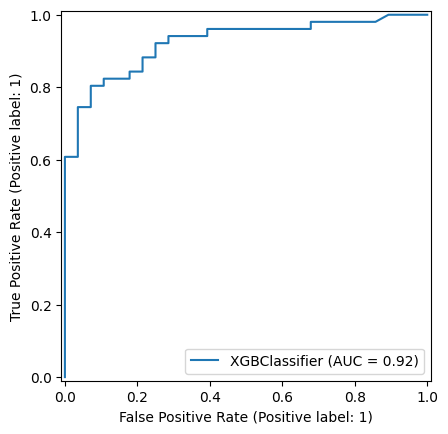

<Figure size 2000x1200 with 0 Axes>

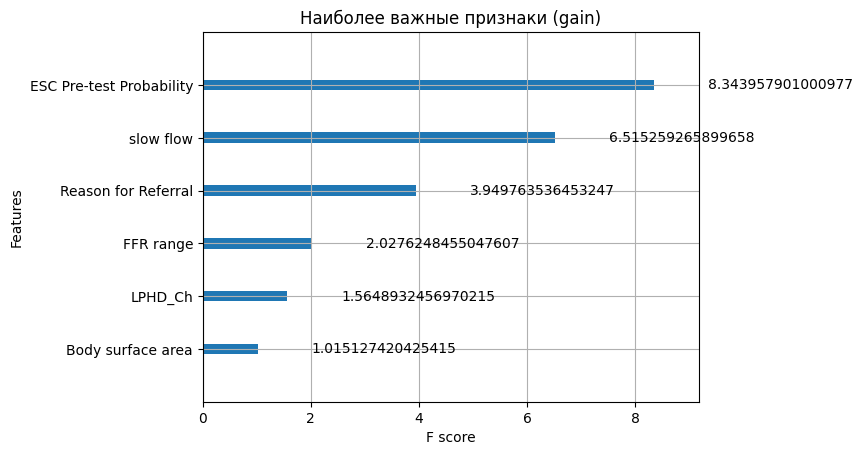

In [192]:
# –í—ã–¥–µ–ª–µ–Ω–Ω—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–ª—è –º–æ–¥–µ–ª–∏:
X_boost = X[['LPHD_Ch', 'Reason for Referral', 'ESC Pre-test Probability', "slow flow", 'Body surface area', 'FFR range']]

X_train, X_test, y_train, y_test = train_test_split(X_boost, y, stratify=y, random_state=42, test_size=0.2)

model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    scale_pos_weight=1,
    learning_rate=0.05,
    reg_lambda=9,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc'
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
print("ROC AUC (Train):", roc_auc_score(y_train, y_train_pred_proba))

y_pred_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

plt.figure(figsize=(20, 12))
plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("–ù–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (gain)")
plt.show()

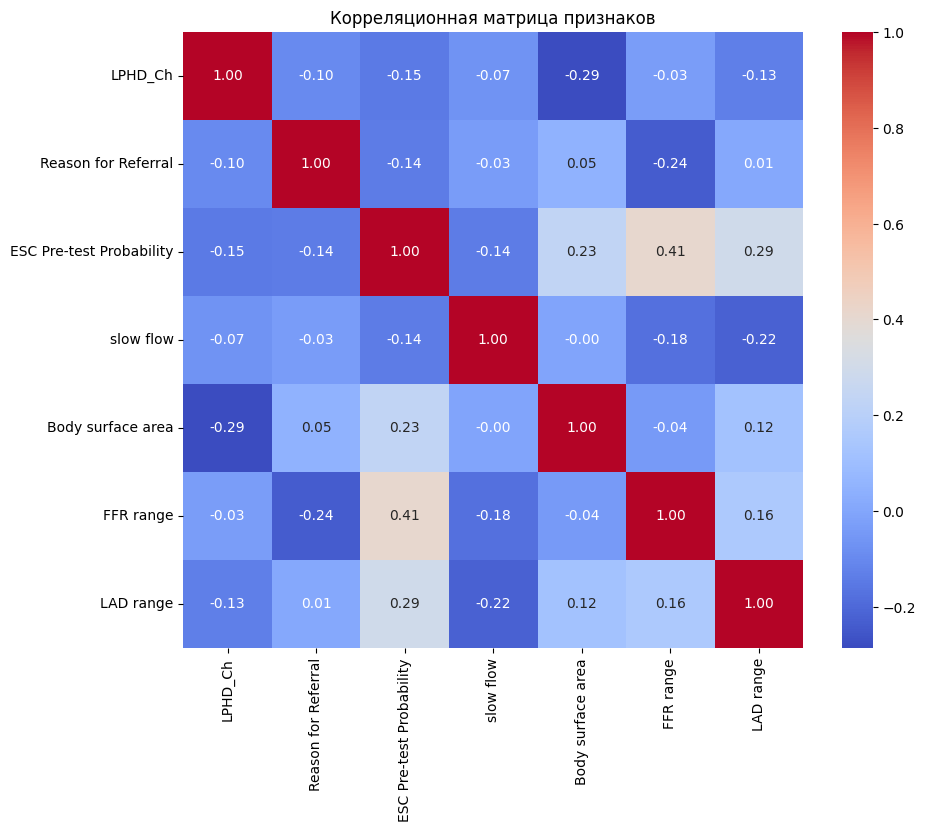

In [157]:
# @title –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
corr_matrix = X_boost.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

df_KNN: –ö–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–±—ä—è—Å–Ω—è—é—â–∏–µ 95% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ = 5
df_MICE: –ö–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–±—ä—è—Å–Ω—è—é—â–∏–µ 95% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ = 5
df_MissForest: –ö–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–±—ä—è—Å–Ω—è—é—â–∏–µ 95% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ = 5


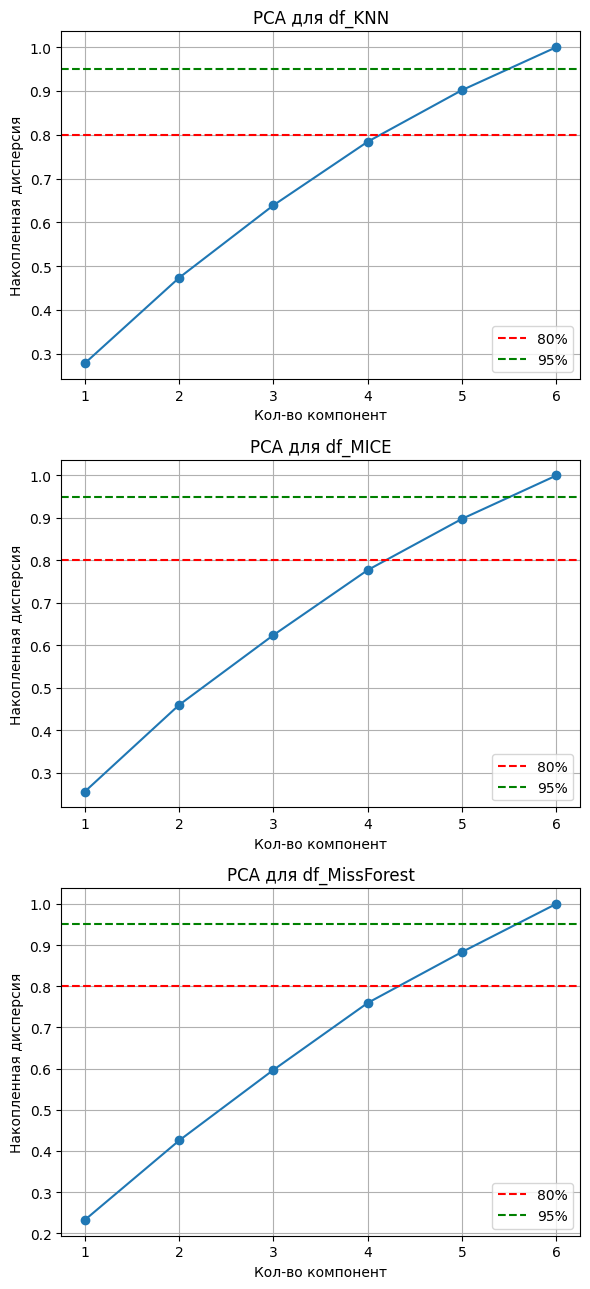

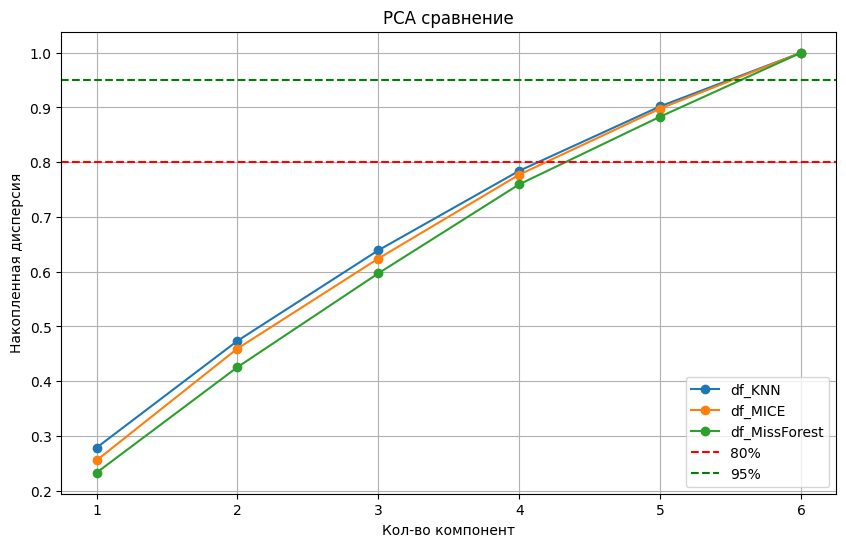

In [188]:
# @title PCA –¥–ª—è –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
fig, axes = plt.subplots(3, 1, figsize=(6, 13))

datasets = [
    ("df_KNN", df_final),
    ("df_MICE", df_MICE),
    ("df_MissForest", df_miss_forest)
]

for ax, (name, data) in zip(axes, datasets):
    data=data[['LPHD_Ch', 'Reason for Referral', 'ESC Pre-test Probability', "slow flow", 'Body surface area', 'FFR range']]
    X_numeric = data.select_dtypes(include=[np.number])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    ax.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
    ax.axhline(0.8, color='r', linestyle='--', label='80%')
    ax.axhline(0.95, color='g', linestyle='--', label='95%')
    ax.set_xlabel('–ö–æ–ª-–≤–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç')
    ax.set_ylabel('–ù–∞–∫–æ–ø–ª–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è')
    ax.set_title(f'PCA –¥–ª—è {name}')
    ax.legend()
    ax.grid()

    n_components = len(list(filter(lambda x: x <= 0.95, explained_variance)))
    print(f"{name}: –ö–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ–±—ä—è—Å–Ω—è—é—â–∏–µ 95% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ = {n_components}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

for name, data in datasets:
    data=data[['LPHD_Ch', 'Reason for Referral', 'ESC Pre-test Probability', "slow flow", 'Body surface area', 'FFR range']]
    X_numeric = data.select_dtypes(include=[np.number])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label=name)

plt.axhline(0.8, color='r', linestyle='--', label='80%')
plt.axhline(0.95, color='g', linestyle='--', label='95%')
plt.xlabel('–ö–æ–ª-–≤–æ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç')
plt.ylabel('–ù–∞–∫–æ–ø–ª–µ–Ω–Ω–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è')
plt.title('PCA —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ')
plt.legend()
plt.grid()
plt.show()


ESC Pre-test Probability    0.594418
Body surface area           0.572147
LPHD_Ch                    -0.455953
FFR range                   0.280731
slow flow                  -0.161018
Reason for Referral        -0.081762
Name: PC1, dtype: float64
slow flow                   0.480523
Reason for Referral         0.472664
LPHD_Ch                    -0.466462
FFR range                  -0.403250
Body surface area           0.306638
ESC Pre-test Probability   -0.267326
Name: PC2, dtype: float64
Reason for Referral         0.743019
slow flow                  -0.665853
LPHD_Ch                     0.052700
ESC Pre-test Probability   -0.030482
FFR range                   0.022566
Body surface area          -0.018615
Name: PC3, dtype: float64
FFR range                   0.837053
slow flow                   0.369557
Reason for Referral         0.302403
Body surface area          -0.210963
ESC Pre-test Probability   -0.128463
LPHD_Ch                    -0.101559
Name: PC4, dtype: float64
LPHD_Ch 

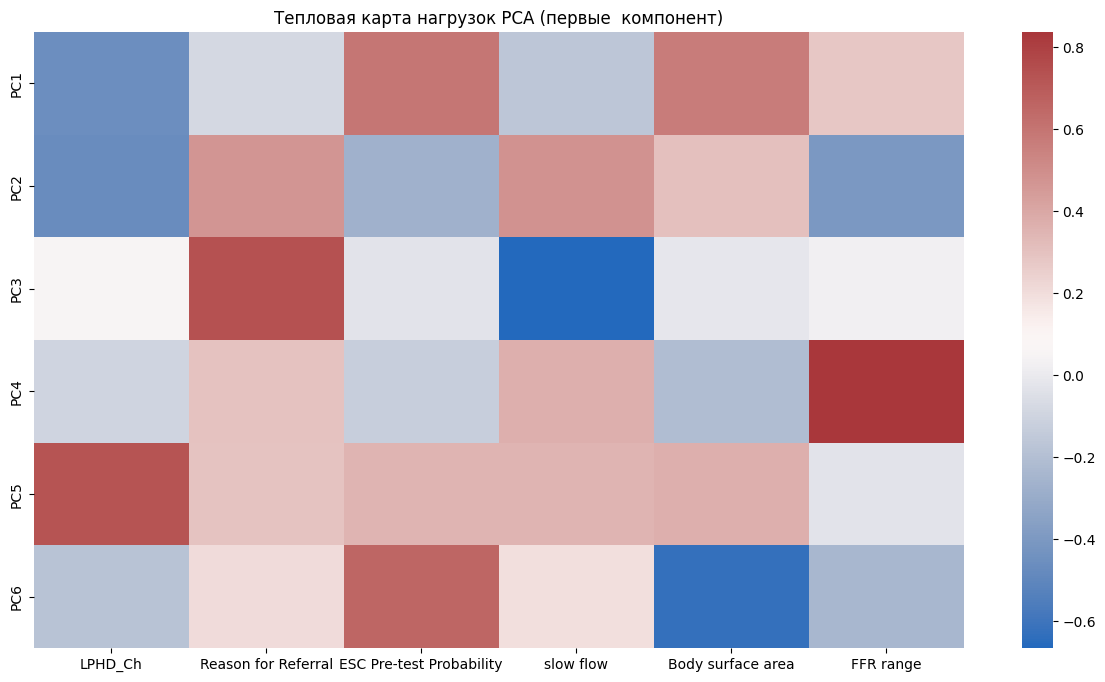

In [189]:
# @title –í–µ—Å–∞ –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç –ø–æ –≤—Å–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º
data=df_MICE[['LPHD_Ch', 'Reason for Referral', 'ESC Pre-test Probability', "slow flow", 'Body surface area', 'FFR range']]
X_numeric = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

loadings_df = pd.DataFrame(
    data=pca.components_,
    columns=X_numeric.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)
def get_most_important_features(component, loadings_df, n_features=10):
    pc_loadings = loadings_df.loc[component]
    most_important = pc_loadings.abs().sort_values(ascending=False).head(n_features)
    return loadings_df.loc[component, most_important.index]
    # return loadings_df.loc[component]

for i in range(1, 7):
  print(get_most_important_features(f'PC{i}', loadings_df, n_features=10))

# print(new_X)
plt.figure(figsize=(15, 8))
sns.heatmap(loadings_df.head(10), cmap='vlag', annot=False)
plt.title('–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –Ω–∞–≥—Ä—É–∑–æ–∫ PCA (–ø–µ—Ä–≤—ã–µ  –∫–æ–º–ø–æ–Ω–µ–Ω—Ç)')
plt.show()

In [ ]:
# @title Optuna
!pip install optuna
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 6),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 20, 300),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 9.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 3.0),
        'use_label_encoder': False,
        'eval_metric': 'error'
    }

    model = XGBClassifier(**params, random_state=42)

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_boost, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return np.mean(scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1500, timeout=1800)

print("üéØ Best trial:")
print("  AUC:", study.best_value)
print("  Params:", study.best_params)



best_params = study.best_params
best_params['eval_metric'] = 'error'

model = XGBClassifier(**best_params, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
print("ROC AUC (Train):", roc_auc_score(y_train, y_train_pred_proba))

y_pred_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()